Admission Prediction using Linear Regression

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the data set
df=pd.read_csv('Admission_Predict.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
# To view the sample of the data
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
# drop column 'Serial No'
x=df.drop(['Serial No.','Chance of Admit '],axis=1)

In [8]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [9]:
y=df['Chance of Admit ']
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

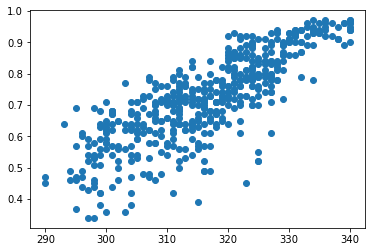

In [10]:
# compare Gre Score and chance of Admit
plt.scatter(df['GRE Score'],y)

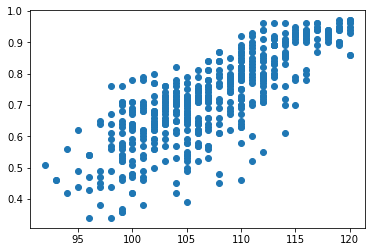

In [11]:
# compare ToEFL Score and chance of Admit
plt.scatter(df['TOEFL Score'],y)

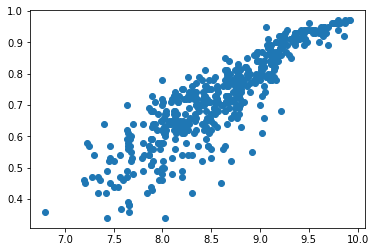

In [12]:
# compare ToEFL Score and chance of Admit
plt.scatter(df['CGPA'],y)

In [13]:
# splitting the data into training and testing
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=100)

In [14]:
# fit the data in Linear Regression model
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [15]:
# calculating the accuray of the model
from sklearn.metrics import r2_score
score = r2_score(reg.predict(test_x),test_y)
score

0.8082585452743907

In [16]:
import pickle

In [17]:
# saving the trained model to a file
filename='Admission_Linear.pickle'
pickle.dump(reg,open(filename,'wb'))

In [19]:
#prediction using the saved model
load_model=pickle.load(open(filename,'rb'))
prediction=load_model.predict(([[320,120,5,5,5,10,1]]))
print(prediction[0])

0.9957864057903034


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
